<a href="https://colab.research.google.com/github/adesai1033/MATH452/blob/main/Final%20Project/CNN/project2_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Data Preprocessing


*   Load the CIFAR-10 dataset.
* Visualize dataset.
*   Normalize dataset.



In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

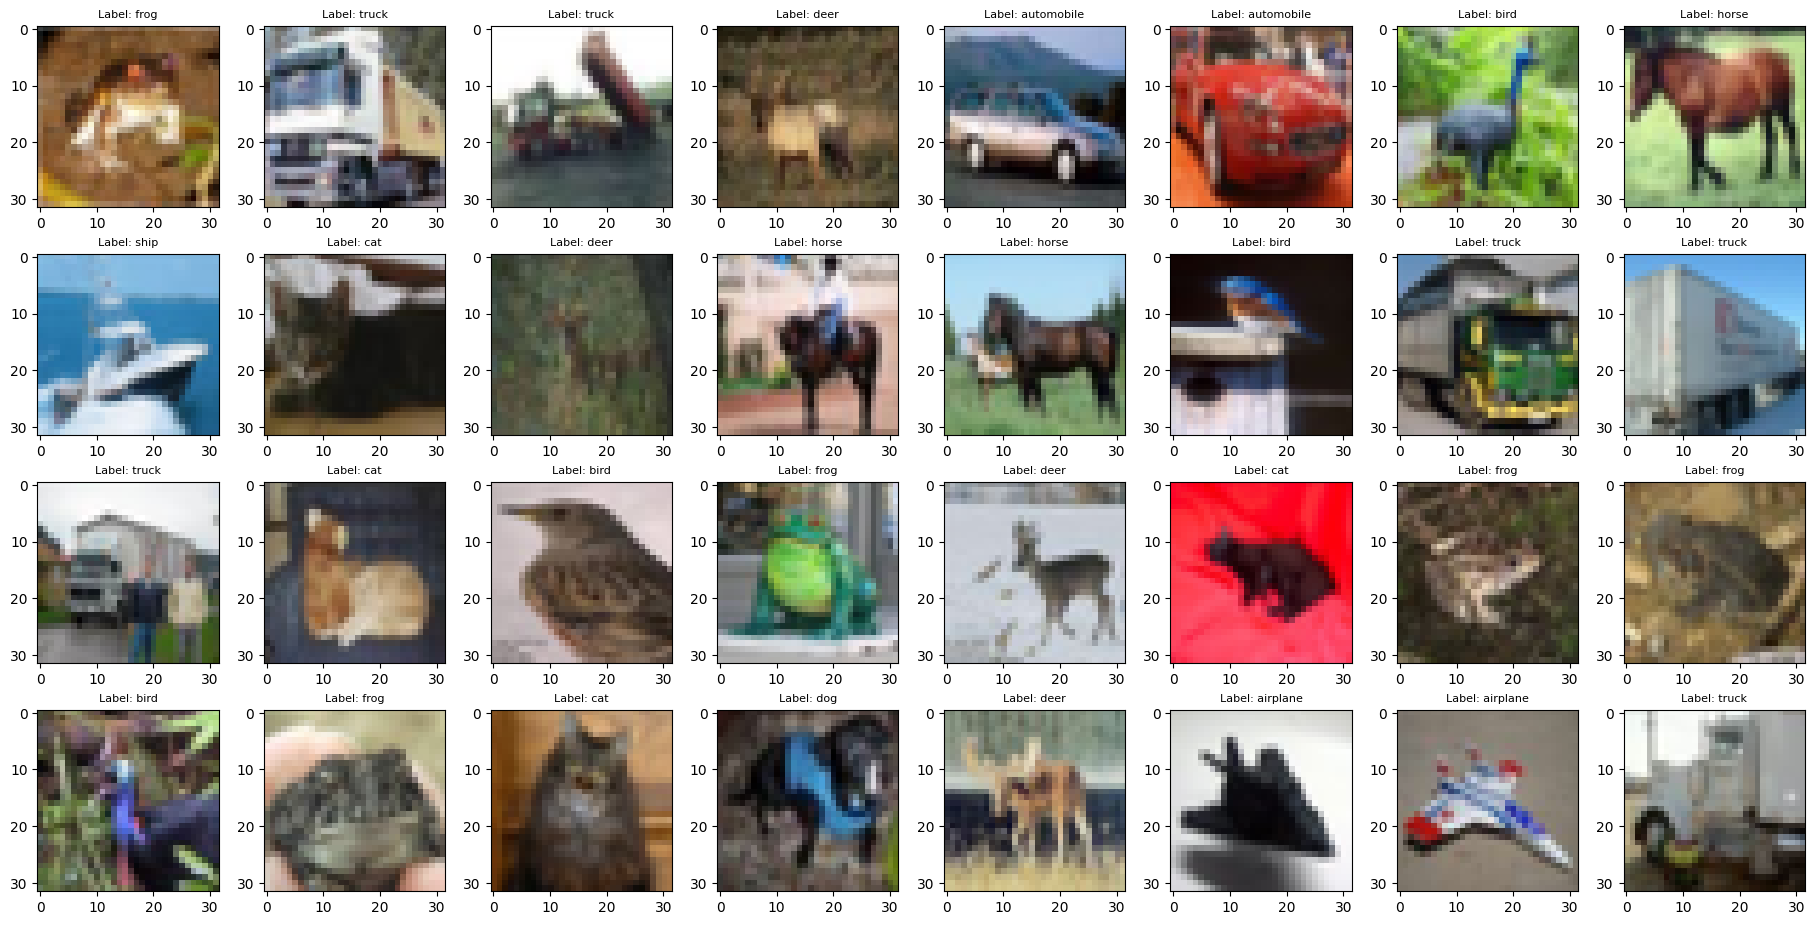

In [3]:
# Display first 32 images of the dataset with its label.
label_mapping = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(label_mapping[y_train[i][0]]), fontsize=8)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig('cifar10_images.png', dpi=300)
plt.show()

In [4]:
# Normalize the pixel value from [0,255] to the range [0,1]
X_train = X_train / 255
X_test = X_test / 255


# Baseline CNN Model

*   Designed and implemented a simple Convolutional Neural Network (CNN) architecture for classification
*   Included basic layers: convolutional layers, activation functions, pooling layers, and fully connected layers.
* Compiled the model with an optimizer (Adam), and loss function (categorical cross-entropy)
* Incorporated ResNet50, a pre-trained deep residual network, to improve feature extraction by leveraging ImageNet-trained weights
* Adapted ResNet50 by adding pooling, dense layers, and dropout, enabling it to specialize in CIFAR-10 classification while preserving computational efficiency


In [5]:
resnet_base = tf.keras.applications.ResNet50(include_top = False, weights = "imagenet", input_shape = (32, 32, 3))
resnet_base.trainable = False

model = Sequential(
    [
        resnet_base,  # Add the ResNet50 base
        GlobalAveragePooling2D(),
        Dense(64, activation='relu'),
        Dropout(0.5),  # Dropout layer with 50% dropout rate
        Dense(10)
    ]
)

In [6]:
model2 = Sequential(
    [
        Input(shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),  # Dropout layer with 50% dropout rate
        Dense(10)
    ]
)

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,719,498 (90.48 MB)

 Trainable params: 131,786 (514.79 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Train the Baseline Model


*   Trained the baseline CNN using the training set and evaluate performance on the validation set.
*   Record metrics: accuracy, precision, recall, F1-score, and loss


In [8]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 334s 207ms/step - accuracy: 0.0986 - loss: 2.3301 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 414s 228ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 377s 225ms/step - accuracy: 0.1024 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 358s 210ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 314s 201ms/step - accuracy: 0.0995 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026


In [9]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis = 1)

# Compute Metrics
y_test_flat = y_test.flatten()
precision = precision_score(y_test_flat, y_pred, average = 'weighted')
recall = recall_score(y_test_flat, y_pred, average = 'weighted')
f1 = f1_score(y_test_flat, y_pred, average = 'weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test_flat, y_pred, target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))


313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 175ms/step
Precision: 0.01
Recall: 0.10
F1-Score: 0.02

Classification Report:
               precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.10      1.00      0.18      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

313/313 - 50s - 160ms/step - accuracy: 0.1000 - loss: 2.3026


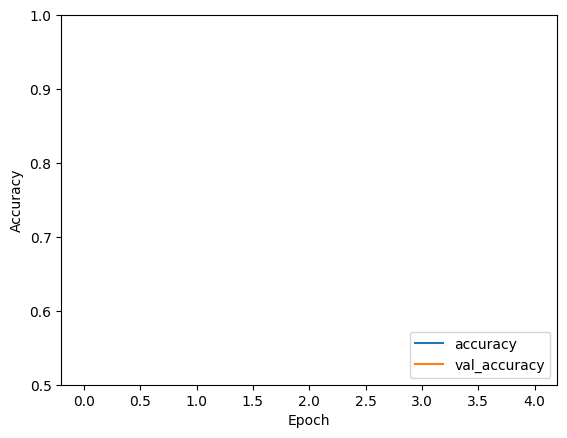

In [10]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose = 2)

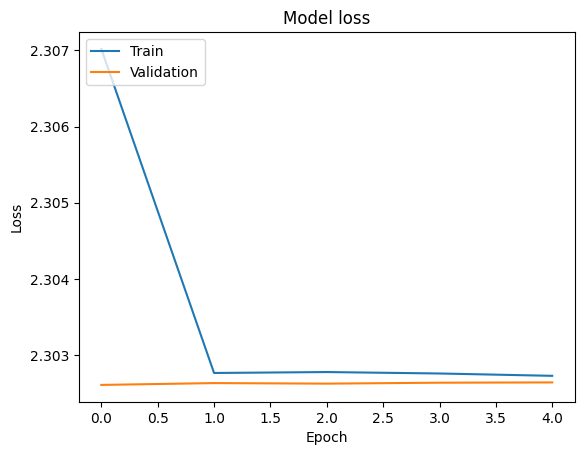

In [11]:
# Plot training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step


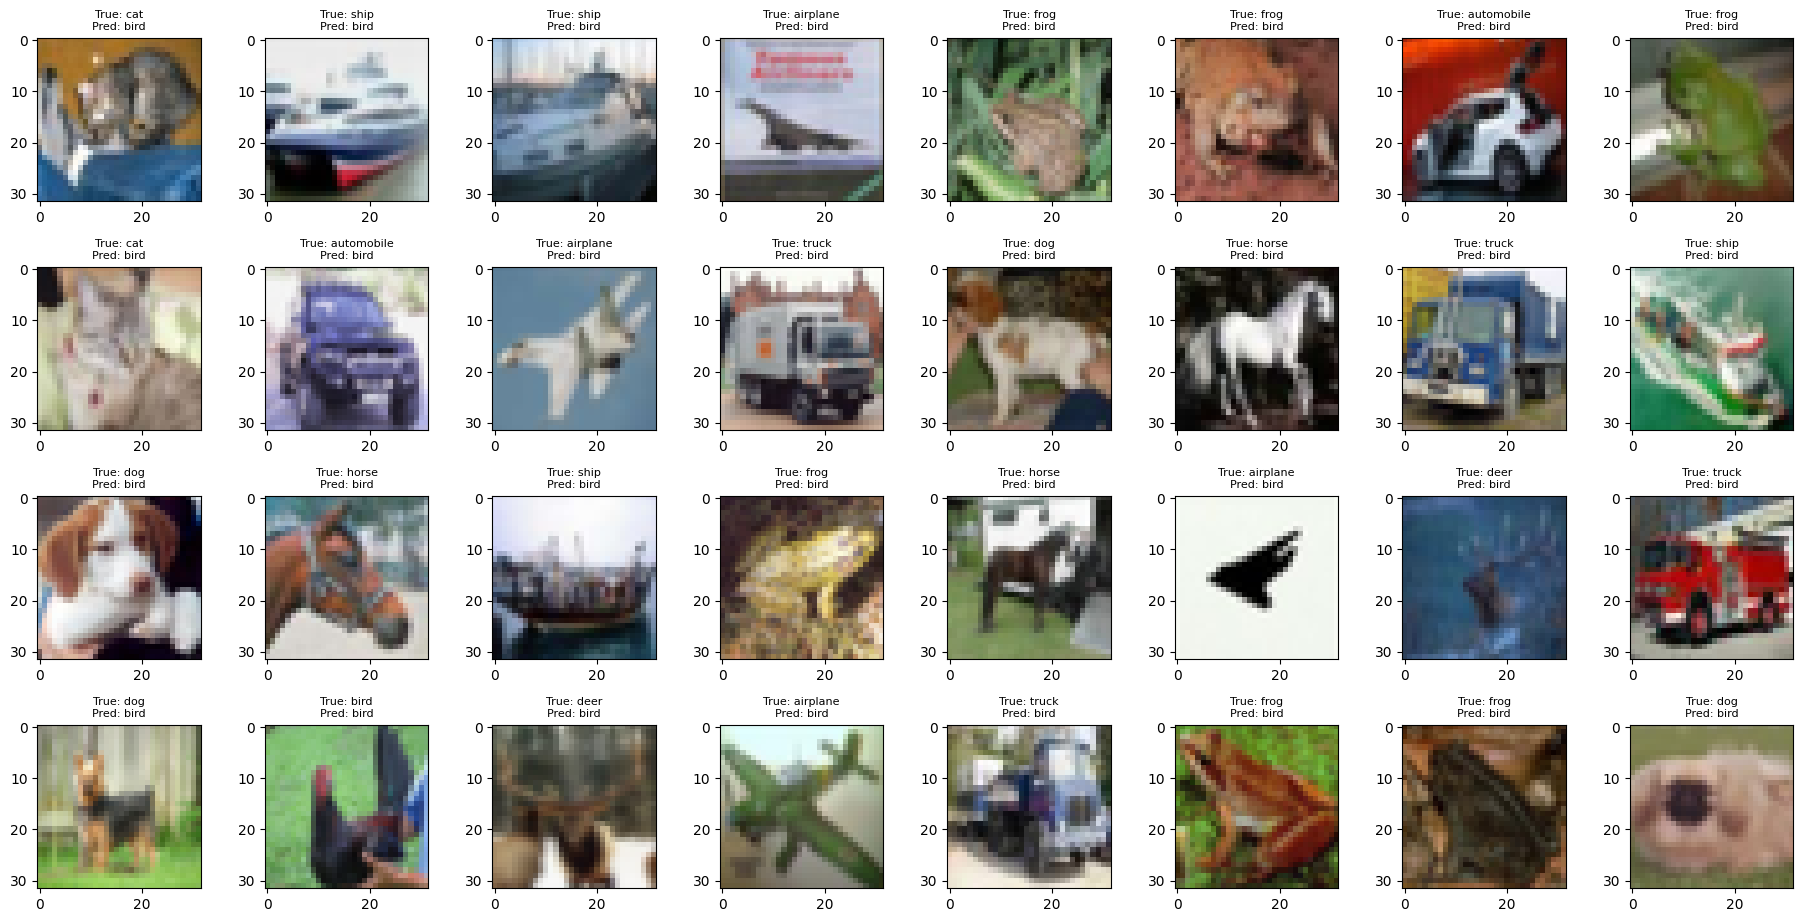

In [12]:
# Get predictions for the test dataset
predictions = model.predict(X_test)

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 32 images from the test dataset with their true and predicted labels
fig = plt.figure(1)
fig.set_size_inches(18.5, 18.5)
for i in range(32):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(X_test[i])
    true_label = label_mapping[y_test[i][0]]
    predicted_label = label_mapping[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize = 8)

plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=0.4, wspace=0.30)
plt.savefig('cifar10_inference.png', dpi=300)
plt.show()